In [2]:
import pandas as pd 


In [3]:
df = pd.read_csv('income.csv')

In [4]:
df

age     workclass  fnlwgt     education  educational-num  \
0       25       Private  226802          11th                7   
1       38       Private   89814       HS-grad                9   
2       28     Local-gov  336951    Assoc-acdm               12   
3       44       Private  160323  Some-college               10   
4       18             ?  103497  Some-college               10   
...    ...           ...     ...           ...              ...   
48837   27       Private  257302    Assoc-acdm               12   
48838   40       Private  154374       HS-grad                9   
48839   58       Private  151910       HS-grad                9   
48840   22       Private  201490       HS-grad                9   
48841   52  Self-emp-inc  287927       HS-grad                9   

           marital-status         occupation relationship   race  gender  \
0           Never-married  Machine-op-inspct    Own-child  Black    Male   
1      Married-civ-spouse    Farming-fishing      Husband  White    Male   
2      Married-civ-spouse    Protective-serv      Husband  White    Male   
3      Married-civ-spouse  Machine-op-inspct      Husband  Black    Male   
4           Never-married                  ?    Own-child  White  Female   
...                   ...                ...          ...    ...     ...   
48837  Married-civ-spouse       Tech-support         Wife  White  Female   
48838  Married-civ-spouse  Machine-op-inspct      Husband  White    Male   
48839             Widowed       Adm-clerical    Unmarried  White  Female   
48840       Never-married       Adm-clerical    Own-child  White    Male   
48841  Married-civ-spouse    Exec-managerial         Wife  White  Female   

       capital-gain  capital-loss  hours-per-week native-country income  
0                 0             0              40  United-States  <=50K  
1                 0             0              50  United-States  <=50K  
2                 0             0              40  United-States   >50K  
3              7688             0              40  United-States   >50K  
4                 0             0              30  United-States  <=50K  
...             ...           ...             ...            ...    ...  
48837             0             0              38  United-States  <=50K  
48838             0             0              40  United-States   >50K  
48839             0             0              40  United-States  <=50K  
48840             0             0              20  United-States  <=50K  
48841         15024             0              40  United-States   >50K  

[48842 rows x 15 columns]

In [5]:
df.education.value_counts()


education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

In [6]:
df.workclass.value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [7]:
df.occupation.value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [8]:
df = pd.concat([df.drop('occupation', axis=1),pd.get_dummies(df.occupation, dtype=int).add_prefix('occupation_')], axis=1)
df = pd.concat([df.drop('workclass', axis=1),pd.get_dummies(df.workclass, dtype=int).add_prefix('workclass_')], axis=1)
df = df.drop('education', axis=1)
df = pd.concat([df.drop('marital-status', axis=1),pd.get_dummies(df["marital-status"], dtype=int).add_prefix('marital-status_')], axis=1)
df = pd.concat([df.drop('relationship', axis=1),pd.get_dummies(df.relationship, dtype=int).add_prefix('relationship_')], axis=1)
df = pd.concat([df.drop('race', axis=1),pd.get_dummies(df.race, dtype=int).add_prefix('race_')], axis=1)
df = pd.concat([df.drop('native-country', axis=1),pd.get_dummies(df['native-country'], dtype=int).add_prefix('native-country_')], axis=1)

In [9]:
df

age  fnlwgt  educational-num  gender  capital-gain  capital-loss  \
0       25  226802                7    Male             0             0   
1       38   89814                9    Male             0             0   
2       28  336951               12    Male             0             0   
3       44  160323               10    Male          7688             0   
4       18  103497               10  Female             0             0   
...    ...     ...              ...     ...           ...           ...   
48837   27  257302               12  Female             0             0   
48838   40  154374                9    Male             0             0   
48839   58  151910                9  Female             0             0   
48840   22  201490                9    Male             0             0   
48841   52  287927                9  Female         15024             0   

       hours-per-week income  occupation_?  occupation_Adm-clerical  ...  \
0                  40  <=50K             0                        0  ...   
1                  50  <=50K             0                        0  ...   
2                  40   >50K             0                        0  ...   
3                  40   >50K             0                        0  ...   
4                  30  <=50K             1                        0  ...   
...               ...    ...           ...                      ...  ...   
48837              38  <=50K             0                        0  ...   
48838              40   >50K             0                        0  ...   
48839              40  <=50K             0                        1  ...   
48840              20  <=50K             0                        1  ...   
48841              40   >50K             0                        0  ...   

       native-country_Portugal  native-country_Puerto-Rico  \
0                            0                           0   
1                            0                           0   
2                            0                           0   
3                            0                           0   
4                            0                           0   
...                        ...                         ...   
48837                        0                           0   
48838                        0                           0   
48839                        0                           0   
48840                        0                           0   
48841                        0                           0   

       native-country_Scotland  native-country_South  native-country_Taiwan  \
0                            0                     0                      0   
1                            0                     0                      0   
2                            0                     0                      0   
3                            0                     0                      0   
4                            0                     0                      0   
...                        ...                   ...                    ...   
48837                        0                     0                      0   
48838                        0                     0                      0   
48839                        0                     0                      0   
48840                        0                     0                      0   
48841                        0                     0                      0   

       native-country_Thailand  native-country_Trinadad&Tobago  \
0                            0                               0   
1                            0                               0   
2                            0                               0   
3                            0                               0   
4                            0                               0   
...                        ...                             ...   
48837                        0       

In [10]:
df['gender'] = df['gender'].apply(lambda x: 1 if x=="Male" else 0)
df['income'] = df['income'].apply(lambda x: 1 if x==">50K" else 0)

In [11]:
df

age  fnlwgt  educational-num  gender  capital-gain  capital-loss  \
0       25  226802                7       1             0             0   
1       38   89814                9       1             0             0   
2       28  336951               12       1             0             0   
3       44  160323               10       1          7688             0   
4       18  103497               10       0             0             0   
...    ...     ...              ...     ...           ...           ...   
48837   27  257302               12       0             0             0   
48838   40  154374                9       1             0             0   
48839   58  151910                9       0             0             0   
48840   22  201490                9       1             0             0   
48841   52  287927                9       0         15024             0   

       hours-per-week  income  occupation_?  occupation_Adm-clerical  ...  \
0                  40       0             0                        0  ...   
1                  50       0             0                        0  ...   
2                  40       1             0                        0  ...   
3                  40       1             0                        0  ...   
4                  30       0             1                        0  ...   
...               ...     ...           ...                      ...  ...   
48837              38       0             0                        0  ...   
48838              40       1             0                        0  ...   
48839              40       0             0                        1  ...   
48840              20       0             0                        1  ...   
48841              40       1             0                        0  ...   

       native-country_Portugal  native-country_Puerto-Rico  \
0                            0                           0   
1                            0                           0   
2                            0                           0   
3                            0                           0   
4                            0                           0   
...                        ...                         ...   
48837                        0                           0   
48838                        0                           0   
48839                        0                           0   
48840                        0                           0   
48841                        0                           0   

       native-country_Scotland  native-country_South  native-country_Taiwan  \
0                            0                     0                      0   
1                            0                     0                      0   
2                            0                     0                      0   
3                            0                     0                      0   
4                            0                     0                      0   
...                        ...                   ...                    ...   
48837                        0                     0                      0   
48838                        0                     0                      0   
48839                        0                     0                      0   
48840                        0                     0                      0   
48841                        0                     0                      0   

       native-country_Thailand  native-country_Trinadad&Tobago  \
0                            0                               0   
1                            0                               0   
2                            0                               0   
3                            0                               0   
4                            0                               0   
...                        ...                             ...   
48837                    

<Axes: >

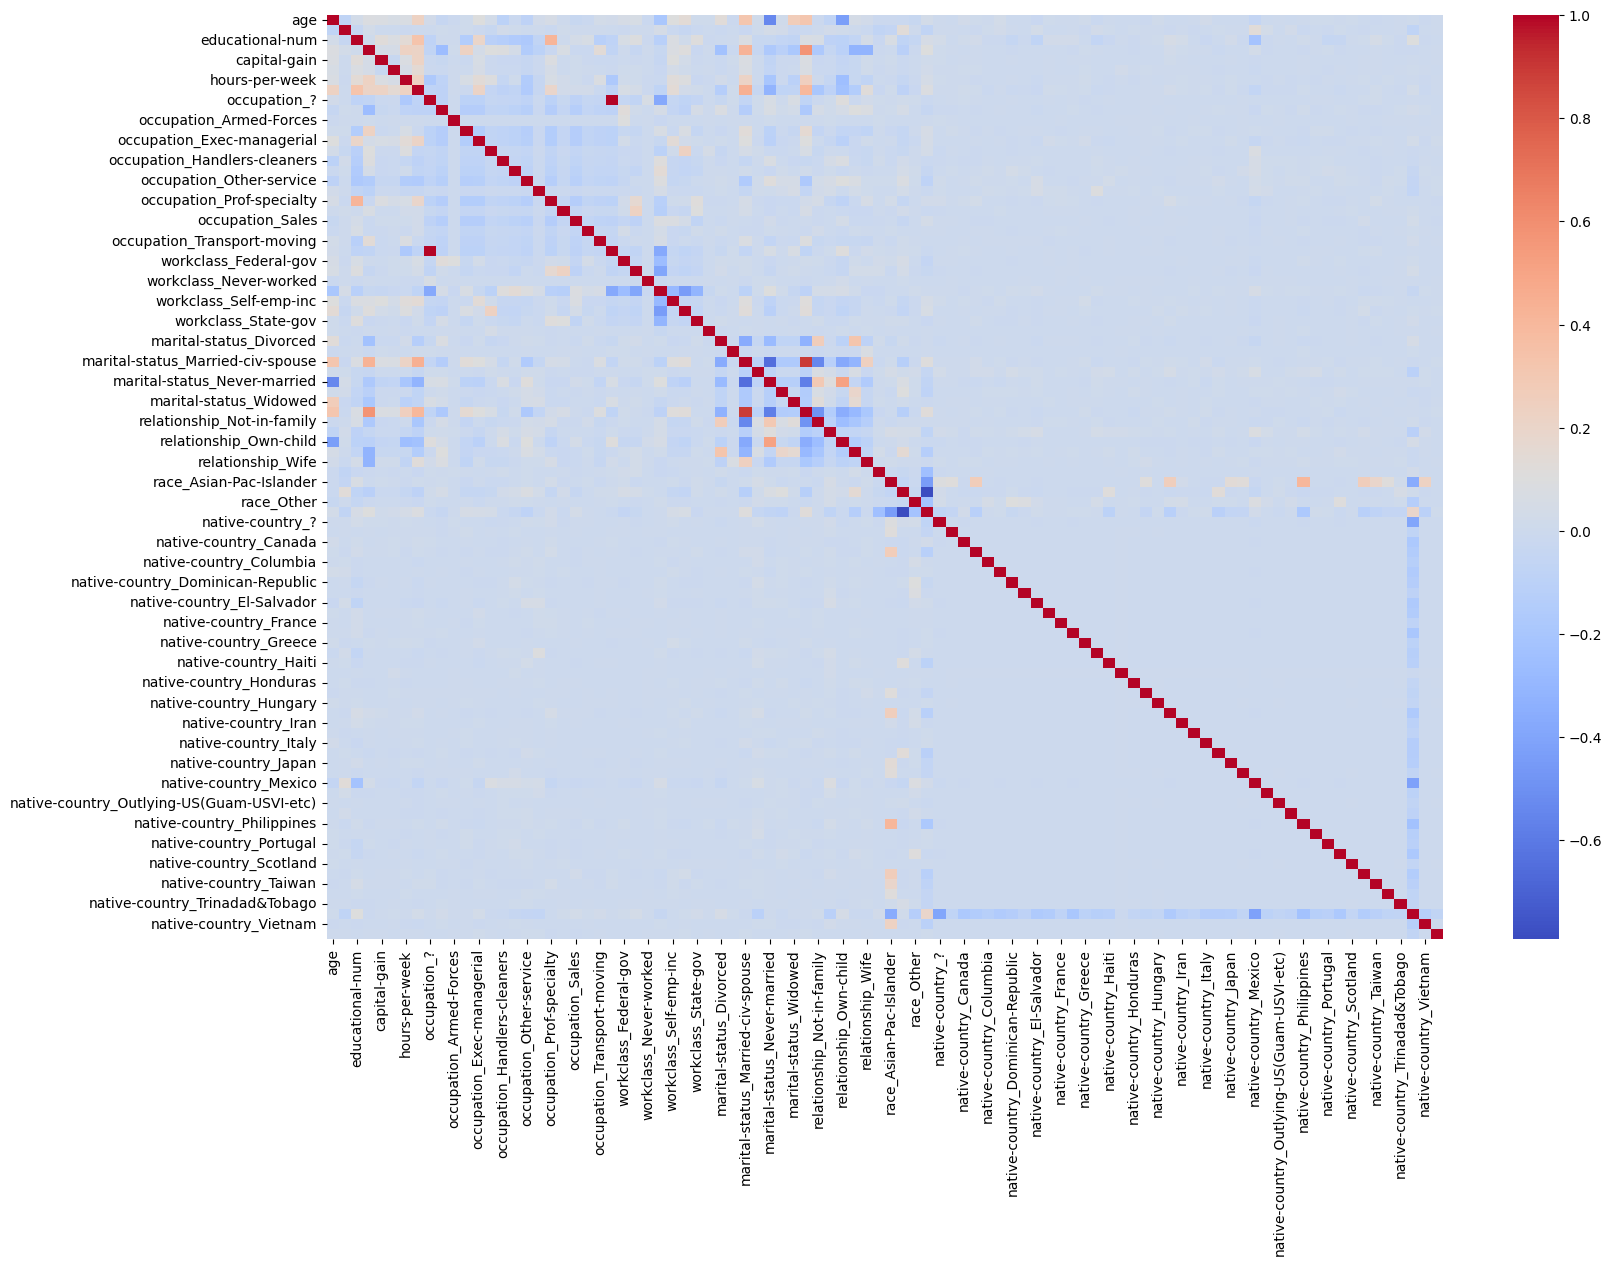

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18,12))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')

In [13]:
df.corr()

age    fnlwgt  educational-num    gender  \
age                             1.000000 -0.076628         0.030940  0.088120   
fnlwgt                         -0.076628  1.000000        -0.038761  0.027739   
educational-num                 0.030940 -0.038761         1.000000  0.009328   
gender                          0.088120  0.027739         0.009328  1.000000   
capital-gain                    0.077229 -0.003706         0.125146  0.047094   
...                                  ...       ...              ...       ...   
native-country_Thailand        -0.001766 -0.001512         0.007283 -0.007117   
native-country_Trinadad&Tobago  0.001056  0.004153        -0.010201 -0.009342   
native-country_United-States    0.011888 -0.070645         0.104210 -0.011167   
native-country_Vietnam         -0.012337 -0.007479        -0.007544 -0.001545   
native-country_Yugoslavia       0.002905  0.004699        -0.005798  0.005262   

                                capital-gain  capital-loss  hours-per-week  \
age                                 0.077229      0.056944        0.071558   
fnlwgt                             -0.003706     -0.004366       -0.013519   
educational-num                     0.125146      0.080972        0.143689   
gender                              0.047094      0.045480        0.228560   
capital-gain                        1.000000     -0.031441        0.082157   
...                                      ...           ...             ...   
native-country_Thailand            -0.002781     -0.002338        0.008558   
native-country_Trinadad&Tobago     -0.003039      0.004028       -0.002911   
native-country_United-States        0.004191      0.009449        0.004390   
native-country_Vietnam             -0.002673     -0.000118       -0.008289   
native-country_Yugoslavia          -0.000474     -0.004713       -0.000359   

                                  income  occupation_?  \
age                             0.230369      0.025683   
fnlwgt                         -0.006339     -0.005405   
educational-num                 0.332613     -0.080053   
gender                          0.214628     -0.063844   
capital-gain                    0.223013     -0.019157   
...                                  ...           ...   
native-country_Thailand        -0.004219     -0.002575   
native-country_Trinadad&Tobago -0.009107     -0.002068   
native-country_United-States    0.032551      0.005546   
native-country_Vietnam         -0.015542     -0.004082   
native-country_Yugoslavia       0.005522     -0.005362   

                                occupation_Adm-clerical  ...  \
age                                           -0.038116  ...   
fnlwgt                                         0.007480  ...   
educational-num                                0.004142  ...   
gender                                        -0.260349  ...   
capital-gain                                  -0.029105  ...   
...                                                 ...  ...   
native-country_Thailand                       -0.001157  ...   
native-country_Trinadad&Tobago                 0.007917  ...   
native-country_United-States                   0.022126  ...   
native-country_Vietnam                         0.010905  ...   
native-country_Yugoslavia                     -0.004860  ...   

                                native-country_Portugal  \
age                                            0.007016   
fnlwgt                                        -0.013577   
educational-num                               -0.047816   
gender                                         0.009649   
capital-gain                                  -0.004355   
...                                                 ...   
native-country_Thailand                       -0.000919   
native-country_Trinadad&Tobago                -0.000872   
native-country_United-States                  -0.109626   
native-country_Vietnam                        -0.001557   
native-count

In [14]:
correlations = df.corr()['income'].abs()
sorted_correlations = correlations.sort_values()
num_cols_to_drop = int(0.8*len(df.columns))
cols_to_drop = sorted_correlations.iloc[:num_cols_to_drop].index
df_dropped = df.drop(cols_to_drop, axis=1)

In [15]:
df_dropped

age  educational-num  gender  capital-gain  capital-loss  \
0       25                7       1             0             0   
1       38                9       1             0             0   
2       28               12       1             0             0   
3       44               10       1          7688             0   
4       18               10       0             0             0   
...    ...              ...     ...           ...           ...   
48837   27               12       0             0             0   
48838   40                9       1             0             0   
48839   58                9       0             0             0   
48840   22                9       1             0             0   
48841   52                9       0         15024             0   

       hours-per-week  income  occupation_Exec-managerial  \
0                  40       0                           0   
1                  50       0                           0   
2                  40       1                           0   
3                  40       1                           0   
4                  30       0                           0   
...               ...     ...                         ...   
48837              38       0                           0   
48838              40       1                           0   
48839              40       0                           0   
48840              20       0                           0   
48841              40       1                           1   

       occupation_Other-service  occupation_Prof-specialty  \
0                             0                          0   
1                             0                          0   
2                             0                          0   
3                             0                          0   
4                             0                          0   
...                         ...                        ...   
48837                         0                          0   
48838                         0                          0   
48839                         0                          0   
48840                         0                          0   
48841                         0                          0   

       workclass_Self-emp-inc  marital-status_Divorced  \
0                           0                        0   
1                           0                        0   
2                           0                        0   
3                           0                        0   
4                           0                        0   
...                       ...                      ...   
48837                       0                        0   
48838                       0                        0   
48839                       0                        0   
48840                       0                        0   
48841                       1                        0   

       marital-status_Married-civ-spouse  marital-status_Never-married  \
0                                      0                             1   
1                                      1                             0   
2                                      1                             0   
3                                      1                             0   
4                                      0                             1   
...                                  ...                           ...   
48837                                  1                             0   
48838                                  1                             0   
48839                                  0                             0   
48840                                  0                             1   
48841                                  1                             0   

       relationship_Husband  relationship_Not-in-family  \
0                         0                           0   
1                   

<Axes: >

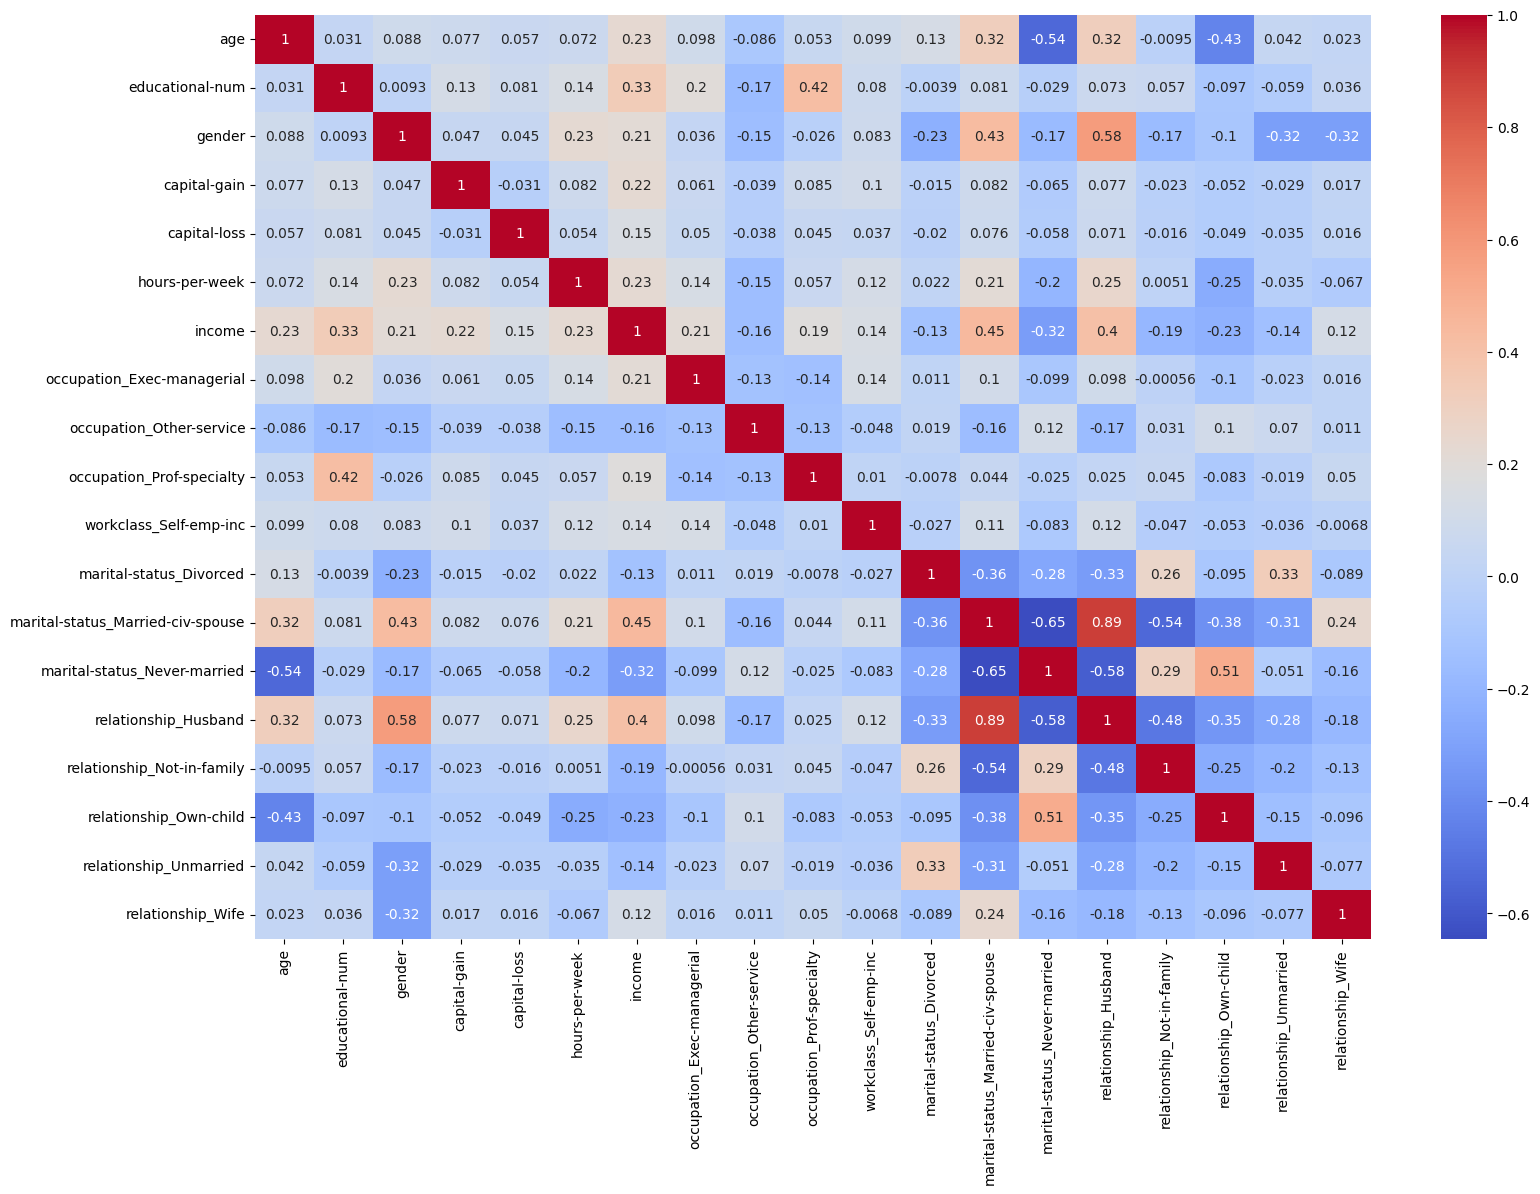

In [16]:
plt.figure(figsize=(18,12))
sns.heatmap(df_dropped.corr(), annot=True, cmap='coolwarm')

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size = 0.2)   

df = df.drop('fnlwgt', axis=1)

In [18]:
train_df

age  fnlwgt  educational-num  gender  capital-gain  capital-loss  \
4930    18   70240                9       0             0             0   
14647   41  101593               13       1             0             0   
17911   39  328466                7       1          2407             0   
32002   45   87583                9       0             0             0   
34434   34  101345               13       0             0             0   
...    ...     ...              ...     ...           ...           ...   
10393   38  150057               13       1             0             0   
25813   43  153160               10       0             0             0   
18586   30  190385               13       0             0             0   
13614   42   54651               15       1             0             0   
9729    31  229636                2       1             0          2042   

       hours-per-week  income  occupation_?  occupation_Adm-clerical  ...  \
4930               40       0             0                        0  ...   
14647              60       1             0                        0  ...   
17911              70       0             0                        0  ...   
32002              14       0             0                        0  ...   
34434              40       1             0                        0  ...   
...               ...     ...           ...                      ...  ...   
10393              50       0             0                        0  ...   
25813              40       0             0                        1  ...   
18586              40       1             0                        0  ...   
13614              40       1             0                        0  ...   
9729               40       0             0                        0  ...   

       native-country_Portugal  native-country_Puerto-Rico  \
4930                         0                           0   
14647                        0                           0   
17911                        0                           0   
32002                        0                           0   
34434                        0                           0   
...                        ...                         ...   
10393                        0                           0   
25813                        0                           0   
18586                        0                           0   
13614                        0                           0   
9729                         0                           0   

       native-country_Scotland  native-country_South  native-country_Taiwan  \
4930                         0                     0                      0   
14647                        0                     0                      0   
17911                        0                     0                      0   
32002                        0                     0                      0   
34434                        0                     0                      0   
...                        ...                   ...                    ...   
10393                        0                     0                      0   
25813                        0                     0                      0   
18586                        0                     0                      0   
13614                        0                     0                      0   
9729                         0                     0                      0   

       native-country_Thailand  native-country_Trinadad&Tobago  \
4930                         0                               0   
14647                        0                               0   
17911                        0                               0   
32002                        0                               0   
34434                        0                               0   
...                        ...                             ...   
10393                    

In [19]:
test_df

age  fnlwgt  educational-num  gender  capital-gain  capital-loss  \
17731   25  298225                9       1             0             0   
1174    74  168782                4       0             0             0   
17548   50  343748               10       1             0             0   
23952   47   30840               14       1             0             0   
14636   56  100285               10       1             0             0   
...    ...     ...              ...     ...           ...           ...   
30642   56  357118               14       0             0             0   
43862   47  200471               11       1          4064             0   
2280    39   77146               10       1             0             0   
1353    34   97614                9       1             0             0   
20937   37  287306               12       0         99999             0   

       hours-per-week  income  occupation_?  occupation_Adm-clerical  ...  \
17731              50       0             0                        0  ...   
1174               35       0             0                        0  ...   
17548              35       0             0                        0  ...   
23952              40       1             0                        0  ...   
14636              45       0             0                        0  ...   
...               ...     ...           ...                      ...  ...   
30642              40       1             0                        0  ...   
43862              40       0             0                        1  ...   
2280               55       1             0                        0  ...   
1353               40       0             0                        0  ...   
20937              40       1             0                        0  ...   

       native-country_Portugal  native-country_Puerto-Rico  \
17731                        0                           0   
1174                         0                           0   
17548                        0                           0   
23952                        0                           0   
14636                        0                           0   
...                        ...                         ...   
30642                        0                           0   
43862                        0                           0   
2280                         0                           0   
1353                         0                           0   
20937                        0                           0   

       native-country_Scotland  native-country_South  native-country_Taiwan  \
17731                        0                     0                      0   
1174                         0                     0                      0   
17548                        0                     0                      0   
23952                        0                     0                      0   
14636                        0                     0                      0   
...                        ...                   ...                    ...   
30642                        0                     0                      0   
43862                        0                     0                      0   
2280                         0                     0                      0   
1353                         0                     0                      0   
20937                        0                     0                      0   

       native-country_Thailand  native-country_Trinadad&Tobago  \
17731                        0                               0   
1174                         0                               0   
17548                        0                               0   
23952                        0                               0   
14636                        0                               0   
...                        ...                             ...   
30642                    

In [20]:
train_x = train_df.drop('income', axis=1)
train_y = train_df['income']

test_x = test_df.drop('income', axis=1)
test_y = test_df['income']

In [21]:
forest = RandomForestClassifier()

forest.fit(train_x, train_y)


RandomForestClassifier()

In [22]:
forest.score(test_x, test_y)

0.8559729757395844

In [23]:
forest.feature_importances_

array([1.53138131e-01, 1.71703819e-01, 1.07200153e-01, 1.36054924e-02,
       1.04032043e-01, 3.38674065e-02, 8.31132901e-02, 1.68416074e-03,
       4.59291143e-03, 8.90061092e-05, 5.48563508e-03, 2.09017925e-02,
       4.18906088e-03, 3.26554568e-03, 3.63671724e-03, 7.46839535e-03,
       1.49647840e-04, 1.79918370e-02, 2.41543388e-03, 5.60902319e-03,
       4.02987952e-03, 3.67257192e-03, 1.76739462e-03, 4.26143782e-03,
       5.16831084e-03, 4.35562698e-06, 8.12528100e-03, 5.50282607e-03,
       7.23026893e-03, 3.95067252e-03, 8.62582526e-05, 5.28046230e-03,
       2.40822222e-04, 6.33611841e-02, 8.99090518e-04, 2.18679078e-02,
       1.92508067e-03, 1.59637465e-03, 4.04794269e-02, 1.27089835e-02,
       1.71104265e-03, 1.01674033e-02, 4.99057799e-03, 9.21613744e-03,
       1.13013613e-03, 2.65545895e-03, 4.25744120e-03, 7.21325733e-04,
       5.08548059e-03, 2.38161291e-03, 2.45041818e-04, 1.16544727e-03,
       5.52016976e-04, 2.18896591e-04, 6.97871072e-04, 2.45682610e-04,
      

In [24]:
forest.feature_names_in_

array(['age', 'fnlwgt', 'educational-num', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'occupation_?',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support', 'occupation_Transport-moving',
       'workclass_?', 'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay',
       'marital-status_Divorced', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent',
       'marital-status

In [25]:
importances = dict(zip(forest.feature_names_in_, forest.feature_importances_))
importances = {k: v for k, v in sorted(importances.items(), key=lambda x: x[1], reverse=True)}


In [26]:
importances

{'fnlwgt': 0.1717038189619947,
 'age': 0.15313813054951195,
 'educational-num': 0.10720015297851909,
 'capital-gain': 0.10403204273920545,
 'hours-per-week': 0.08311329009721304,
 'marital-status_Married-civ-spouse': 0.06336118414687639,
 'relationship_Husband': 0.04047942692683998,
 'capital-loss': 0.03386740650072169,
 'marital-status_Never-married': 0.021867907758288164,
 'occupation_Exec-managerial': 0.020901792465355243,
 'occupation_Prof-specialty': 0.01799183702232694,
 'gender': 0.013605492371855462,
 'relationship_Not-in-family': 0.012708983480362264,
 'relationship_Own-child': 0.010167403281570786,
 'relationship_Wife': 0.00921613743839928,
 'workclass_Private': 0.00812528100136106,
 'occupation_Other-service': 0.007468395348903955,
 'workclass_Self-emp-not-inc': 0.007230268928469328,
 'occupation_Sales': 0.005609023189874694,
 'workclass_Self-emp-inc': 0.005502826072164136,
 'occupation_Craft-repair': 0.0054856350776715124,
 'native-country_United-States': 0.0052945971056384

In [36]:
#hyperparameter tuning
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50,100,250],
    'max_depth': [5,10,30,None],
    'min_samples_split': [2,4],
    'max_features': ['sqrt','log2']
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(),
                           param_grid=param_grid, verbose=10)

In [39]:
grid_search.fit(train_x,train_y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 1/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.838 total time=   0.4s
[CV 2/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 2/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.843 total time=   0.4s
[CV 3/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 3/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.830 total time=   0.4s
[CV 4/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 4/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.839 total time=   0.3s
[CV 5/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 30, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 4],
                         'n_estimators': [50, 100, 250]},
             verbose=10)

In [40]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=30, min_samples_split=4, n_estimators=250)

In [41]:
forest = grid_search.best_estimator_

In [45]:
forest.score(test_x,test_y)


0.8636503224485618

In [46]:
importances = dict(zip(forest.feature_names_in_, forest.feature_importances_))
importances = {k: v for k, v in sorted(importances.items(), key=lambda x: x[1], reverse=True)}


In [47]:
importances

{'capital-gain': 0.12727874959270516,
 'educational-num': 0.11895292642896098,
 'age': 0.11821407955336656,
 'fnlwgt': 0.09594435586364038,
 'marital-status_Married-civ-spouse': 0.08787453638549944,
 'hours-per-week': 0.07349683367072625,
 'relationship_Husband': 0.054786855777400424,
 'capital-loss': 0.04339941650047796,
 'marital-status_Never-married': 0.030697552075376378,
 'occupation_Exec-managerial': 0.024840242288722923,
 'occupation_Prof-specialty': 0.02188726353911124,
 'gender': 0.014706559574026095,
 'relationship_Not-in-family': 0.013496877850599392,
 'relationship_Wife': 0.011919995843488644,
 'relationship_Own-child': 0.01134575067584012,
 'occupation_Other-service': 0.010309104304175386,
 'workclass_Self-emp-not-inc': 0.008115567198075576,
 'marital-status_Divorced': 0.007761291557646343,
 'workclass_Private': 0.007731707654435739,
 'workclass_Self-emp-inc': 0.006849536105271209,
 'relationship_Unmarried': 0.006021204801112577,
 'occupation_Sales': 0.005833530823690016,
